## Multiclass Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

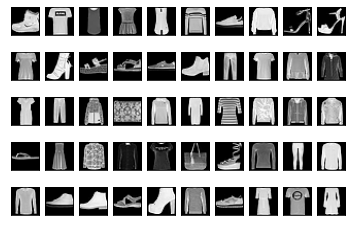

In [24]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data, cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [25]:
y_train[0:50]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3], dtype=uint8)

In [26]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
X_train=X_train/255
X_test=X_test/255

In [28]:
X_train.shape

(60000, 784)

In [29]:
# Decision tree does not need scaling but all other model needs scaling 
# StandardScaler calculates Z-value: i.e. how many standard deviation from the mean value 
# Scaling is the most important factor in neural network otherwise the model will fail. 


In [30]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [31]:
X_train.shape

(60000, 784)

In [32]:
X_test.shape

(10000, 784)

In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [34]:
# Create the model Sequential
model= Sequential()

In [35]:
# First Hidden Layer
model.add(Dense(units=128, 
                activation='relu', 
                input_shape=(784,)))

# Second Hidden Layer
model.add(Dense(units=64, 
                activation='tanh'))
# Third Hidden layer
model.add(Dense(units=32, 
                activation='relu'))

# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 100480 shows by multiplying input shape as (784+1)*128 neurons which is 100480

In [38]:
model.compile(optimizer=Adam(learning_rate=0.003),
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [39]:
result = model.fit(X_train, 
                   y_train,
                   validation_data=(X_test,y_test),
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6905 - accuracy: 0.7412 - val_loss: 0.5127 - val_accuracy: 0.8088
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4598 - accuracy: 0.8318 - val_loss: 0.4760 - val_accuracy: 0.8277
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4088 - accuracy: 0.8504 - val_loss: 0.4374 - val_accuracy: 0.8409
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3819 - accuracy: 0.8604 - val_loss: 0.4028 - val_accuracy: 0.8562
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3592 - accuracy: 0.8681 - val_loss: 0.3928 - val_accuracy: 0.8561
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3463 - accuracy: 0.8716 - val_loss: 0.4067 - val_accuracy: 0.8512
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.8780 - val_loss: 0.3752 - val_accuracy:

## Optimization Algorithms, Tuning, and Interpretability

### Optimization Algorithms
### Batch Normalization
### Hyperparameter Tuning

### Optimization Algorithms

#### Optimization means minimizing the loss using loss function. 
### Types of Optimizers
#### Gradient Descent
#### SGD
#### NAG
#### Adagrad
#### RMSprop
#### Adam

#### You can split your records in smaller batches or subset of smaller records.  For example if you have dataset of 100 records then you can split into 10 records each which are mutually exclusive.  You pass these datasets to neural network and updates the weights after one subset has been processed.  Each subset is called a batch.  

#### The default value of Batch size is 32. So, if your training dataset has 60,000 records then each batch will have 1875 records. This is called mini batch gradient descent. 

#### If you specify batch_size=100 then 60,000 records will split into 100 batches each containing 600 records.  

#### Tensroflow always minibatch gradient descent. 

#### What is the minimum value a batchsize can have? Answer: 1. 
#### Weight will be updated after every single record gets processed. This is called "Stochastic Gradient Descent".  

#### What is the maximum value of batchsize?
#### Batchsize is euqal to the entire training dataset.  This is called "Vanila Gradient Descent"

#### Anything between "Stochastic" and "Vanila" is called "Minibatch Gradient Descent". 

#### Yann LeCun suggested that batchsize should not be more than 32.  


### Gradient Descent vs. SGD-Mini Batch
#### Gradient Descent is computationally expensive because it updates the weight only after processing the entire dataset. 
#### SGD-Mini Batch is noisy because weights are updated after each mini batch.  Oscillation or noise: weights are getting updated frequently

#### Concept called a momentum: A smoothening technique using exponentially weighted moving average to smoothen out the noise. 

#### Without momentum smoothens out the oscillations and ensures that the neural network reaches the minimum value faster. 

#### momentum 

### Moving Average 
#### Beta (generally it is set to 0.9, value can only be between 0 and 1)
#### Exponentially Weighted Moving Agverage = (Beta*Previous Value) + ((1- Beta value)* Current Value)
#### Momentum is Exponentially Weighted Moving Average (EMA)
#### V1 = Beta * V0 + ((1-Beta)*Theta1)
#### V2 = Beta * V1 + ((1-Beta)*Theta2)
#### V3 = Beta * V2 + ((1-Beta)*Theta3)

#### Gradient Descent (min-batch) with Momentum
#### For each batch
####  Cmpute dw, db
####  Vdw = Beta*Vdw + (1-Beta)*dw
####  Vdb = Beta*Vdb + (1-Beta)*db
####  w = w - alpha *Vdw
####  b = b - alpha *Vdb

####  Local Minima and Global Minima

###  Root Mean Squred Propagation
####  Sdw = Beta2 *Sdw + (1-Beta) * dw^2
####  Sdb = Beta2 *Sdb + (1-Beta) * db^2

####  w = w - alpha * dw/sqrt(Sdw+ epsilon)
####  b = b - alpha * db/sqrt(Sdb+ epsilon)

###  Adaptive Gradient (AdaGrad)
#### Learning Rate of t = Initial Learning Rate /(Squareroot(Beta of t + Epsilon); Epsilon is small nonzero value. 


###
###  Adaptive Moment with Estimation

####  For each batch,
####  Vdw = Beta1*Vdw + (1-Beta1)*dw
####  Vdw = Vdw(1-Beta1 to the power of t)

####  Vdb = Beta1*Vdb + (1-Beta1)*db
####  Vdb = Vdb(1-Beta1 to the power of t)

####  Sdw = Beta2*Sdw + (1-Beta2)*dw^2
####  Sdb = Beta2*Sdb + (1-Beta2)*db^2




#### Adam is used for stochastic optimization. 
#### Adam is the most powerful. 

##
## Batch Normalization

### Normalization is scaling down a large range of data into smaller range
### Standardization

#### Neural Network is very sensitive to Standardization. 

#### Weights suddenly become large which cascades through all the layers which further causes instability. 
#### Normalization feeding into network is not enought, the outputs from the neuron should also be normalized. 

#### Batch Nomralization is implemented at a layer
#### It maintains 4 parameters: Beta, Gamma, Mean, Variance
#### m, s, g, b and gamma and beta are maintained. 

#### Batch normaliation is implemented whereever you want to apply. 
#### It's not that you always have to use Batch Normalization.  

In [40]:
from tensorflow.keras.layers import BatchNormalization

In [41]:
model_bn = Sequential()

In [42]:
# First Hidden Layer
model_bn.add(Dense(units=128, activation='relu', input_shape=(784, )))


In [43]:
# Add Batch Normalization
model_bn.add(BatchNormalization())

In [46]:
# Second Hidden Layer
model_bn.add(Dense(units=64, activation = 'tanh'))

In [47]:
# Third Hidden Layer
model_bn.add(Dense(units=32, activation = 'relu'))

# Output Layer
model_bn.add(Dense(units=10, activation = 'softmax'))

In [49]:
# Batch Normalization adds another layer after the first layer whcih has 4*128 Neurons = 512 Neurons
# gamma weights, beta weights, moving_mean, moving_variance
model_bn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,658
Trainable params: 111,402
Non-trainable params: 256
______________________________________________

In [50]:
model_bn.compile(optimizer=Adam(learning_rate=0.003),
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [52]:
result = model_bn.fit(X_train, 
                   y_train,
                   validation_data=(X_test,y_test),
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3104 - accuracy: 0.8853 - val_loss: 0.3506 - val_accuracy: 0.8747
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3009 - accuracy: 0.8881 - val_loss: 0.3698 - val_accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2985 - accuracy: 0.8878 - val_loss: 0.4117 - val_accuracy: 0.8569
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2927 - accuracy: 0.8907 - val_loss: 0.3836 - val_accuracy: 0.8600
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2886 - accuracy: 0.8916 - val_loss: 0.3948 - val_accuracy: 0.8583
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2833 - accuracy: 0.8941 - val_loss: 0.3737 - val_accuracy: 0.8656
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8947 - val_loss: 0.3740 - val_accuracy:

In [54]:
model_bn.get_weights()

[array([[-5.1487237e-03, -1.0126429e+00,  1.9049074e-01, ...,
         -1.5993123e-01, -2.6389856e-02,  3.5268903e-02],
        [ 3.3034418e-02, -8.5324639e-01,  6.9857948e-02, ...,
          2.8092748e-01, -3.1266917e-02, -6.1734542e-02],
        [ 3.3123229e-02, -4.1007206e-01, -9.2552401e-02, ...,
         -2.2415214e+00, -4.2481393e-02,  6.1549433e-02],
        ...,
        [-3.0163087e-02,  4.0220591e-01,  2.1057868e-01, ...,
          9.8380470e-01,  3.4302182e-02, -6.4181417e-02],
        [ 2.9368734e-02, -1.3372985e-01,  6.5918699e-02, ...,
          8.6933810e-01, -4.4915948e-02,  8.4516332e-03],
        [ 2.4340441e-02, -6.9715500e-01, -8.7666914e-02, ...,
          8.6297613e-01, -7.5565763e-02, -9.5024705e-05]], dtype=float32),
 array([-0.01038294,  0.12981454, -0.08841065, -0.01801544, -0.01801462,
        -0.1381271 , -0.02575736, -0.01801633, -0.0180147 , -0.08701132,
        -0.0180162 ,  0.18903752, -0.0180159 ,  0.19748636, -0.12296516,
        -0.03969246, -0.0166764

##
## Vanishing Gradient

#### If deltaJ/deltaW in Gradient Descent becomes zero or close to zero then weight remains the same.  

#### Therefore a better activation function is to use other methods such as relu method or tanh method.  
#### 

#### Exploding Gradient
#### The opposite of Vanishing Gradient.  If deltaJ/deltaW is so high that weight becomes problematic
#### This is where we use Gradient Clipping to handle Exploding Gradient
####
#### Another way you will see accuracy becomes infinite (Exploding Gradient Problem)

### 
##  Hyperparameter Tuning
#### Parameters passed to the algorithms are called Hyperparameters
#### For example K-means Clustering, the number of Centroid is a model parameter. 
#### 
#### 1. Learning Rate
#### 2. Number of Hidden Units
#### 3. Convolutional Kernet Width
#### 4. Mini Batch Size
#### 5. Number of Epochs: We don't tune normally because early stopping is used. 
#### 
#### 
#### Two Methods to 
####  1. Manual - Trial and Error
####  2. Automatic 
####  
###  Evolutionary Optimization
####  

In [55]:
np.random.seed(12345)

In [56]:
df_diab = pd.read_csv('diabetes.csv')

In [57]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df_diab.shape

(768, 9)

In [59]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

####  Once you run the hyperparameters and get the idea such as learning rate and then apply in the model instead of letting Keras Tuner to use hyperparameters.  
####  The best approach is to take the guidance from Keras Tuner. 

####  
####  HyperBand

## Explore/Exploit Dilemma

####  
##  Interpretability
####  
####  Example, if you reject the loan application then a person can ask why the loan application is rejected and the bank has to explain. 
####  1. Fairness
####  2. Privacy
####  3. Reliability
####  4. Causality
####  5. Trust
####  
#### Correlation is not causality. Correlation does not necessarily gives the relationship but gives the direction.  
#### Causality looks at the impact of a particular feature on the final outcome.  Shaply value interprets the causality. 
#### For example, there is very strong relationship in who wins the superbowl vs. who wins the presidential election. So even if there is high correlation, there is no dependence of one variable with another. 

In [60]:
import shap

In [61]:
shap.__version__

'0.35.0'

In [62]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [65]:
explainer = shap.KernelExplainer(model[0], data=X_train_scaled)

TypeError: 'Sequential' object is not subscriptable